# CODED WORK OF PROJECT!

The coded section of this project is written in Python. Each operation is numbered, and an explanation is provided immediately after the code to clearly describe the purpose of that step.

# 1.	Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


These libraries are required for data analysis. Pandas handles data manipulation, NumPy supports numerical operations, Seaborn and Matplotlib are used for visualization, and Statsmodels is applied for statistical modeling and econometric analysis.

# 2.	Reading the Dataset

In [2]:
Career = pd.read_excel("Career data_PDA_4053.xlsx")
Career

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Job Security,Career Change Interest,Skills Gap,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48.0,Male,7.0,High School,High,7.0,10.0,83.0,...,8.0,0,8.0,0,0.0,1,2.0,0.0,1.0,0.0
1,Education,Economist,44.0,Male,26.0,Master's,Low,10.0,3.0,55.0,...,9.0,0,3.0,0,1.0,1,2.0,1.0,9.0,0.0
2,Education,Biologist,21.0,Female,27.0,Master's,NaN,8.0,3.0,78.0,...,4.0,0,4.0,0,0.0,0,2.0,1.0,2.0,0.0
3,Education,Business Analyst,33.0,Male,14.0,PhD,Medium,7.0,9.0,NaN,...,5.0,0,NaN,0,0.0,0,9.0,0.0,1.0,0.0
4,Arts,Doctor,28.0,Female,0.0,PhD,Low,3.0,1.0,8.0,...,3.0,0,5.0,0,1.0,0,2.0,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Biology,Psychologist,51.0,Male,1.0,PhD,High,10.0,6.0,47.0,...,3.0,0,8.0,1,0.0,1,7.0,1.0,10.0,0.0
4996,Mechanical Engineering,Economist,35.0,Female,16.0,Master's,High,1.0,4.0,2.0,...,4.0,1,10.0,1,0.0,0,6.0,0.0,10.0,1.0
4997,Education,Doctor,30.0,Female,9.0,High School,Medium,8.0,1.0,55.0,...,4.0,0,5.0,0,0.0,0,5.0,2.0,9.0,0.0
4998,Economics,Economist,38.0,Male,6.0,Bachelor's,High,10.0,7.0,30.0,...,2.0,0,6.0,1,0.0,0,3.0,1.0,8.0,0.0


The dataset is loaded from an Excel file into a dataframe named Career. Displaying the dataframe allows inspection of the dataset structure. The data contains 5000 rows and 21 columns, with some variables containing missing values.

# 3.  Checking Dataset Information

In [3]:
Career.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Field of Study               4999 non-null   object 
 1   Current Occupation           4996 non-null   object 
 2   Age                          4996 non-null   float64
 3   Gender                       4993 non-null   object 
 4   Years of Experience          4998 non-null   float64
 5   Education Level              4994 non-null   object 
 6   Industry Growth Rate         4995 non-null   object 
 7   Job Satisfaction             4998 non-null   float64
 8   Work-Life Balance            4997 non-null   float64
 9   Job Opportunities            4993 non-null   float64
 10  Salary                       4994 non-null   object 
 11  Job Security                 4996 non-null   float64
 12  Career Change Interest       4995 non-null   object 
 13  Skills Gap        

This provides an overview of data types and missing values. A key issue observed is that the Salary variable is stored as an object instead of numeric. Missing values are present across multiple variables.

# 4. Checking for Duplicates

In [4]:
print("The total count of duplicates is:", Career.duplicated().sum())

The total count of duplicates is: 0


The result confirms that no duplicate records exist in the dataset.

# 5. Number of Unique Values

In [5]:
print(Career.nunique())

Field of Study                   10
Current Occupation               10
Age                              40
Gender                            2
Years of Experience              40
Education Level                   4
Industry Growth Rate              3
Job Satisfaction                 10
Work-Life Balance                10
Job Opportunities               100
Salary                         4930
Job Security                     10
Career Change Interest            3
Skills Gap                       10
Certifications                    3
Freelancing Experience            2
Geographic Mobility               3
Professional Networks            10
Career Change Events              3
Technology Adoption              10
Likely to Change Occupation       2
dtype: int64


This shows how many distinct values each variable contains, helping identify categorical diversity and numerical range.

# 6. Viewing Unique Entries

In [6]:
print(Career["Field of Study"].unique())

['Medicine' 'Education' 'Arts' 'Computer Science' 'Business'
 'Mechanical Engineering' 'Biology' 'Law' 'Economics' 'Psychology' nan]


This step reveals possible data entry issues. Variables such as Career Change Interest, Certifications, and Geographic Mobility contain the value "A", which is invalid for binary variables.

# 7. Counting Invalid Entries

In [7]:
print(Career["Career Change Interest"].value_counts())

Career Change Interest
0    4003
1     991
A       1
Name: count, dtype: int64


This confirms that the value “A” appears only a few times and represents an error.

# 8. Creating a Copy

In [9]:
Career2 = Career.copy(deep=True)

A copy of the dataset is created to preserve the original data during cleaning.

# 9. Replacing Invalid Values

In [10]:
Career2.replace("A", np.nan, inplace=True)

/var/folders/gs/jfdfnrpd5xg7mrz9jw5cpfzh0000gn/T/ipykernel_25460/297100622.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Career2.replace("A", np.nan, inplace=True)


Invalid values (“A”) are replaced with missing values since these are binary variables.

# 10. Handling Missing Values

In [12]:
Career2.dropna(inplace=True)

Only 1.86% of the data is missing, so rows with missing values are removed. This results in a clean dataset of 4941 rows.

# 11. Converting Salary to Numeric

In [13]:
Career2['Salary'] = pd.to_numeric(Career2['Salary'], errors='coerce')

Salary is converted from object to numeric format to enable statistical analysis.

# 12. Visualizing Salary Outliers

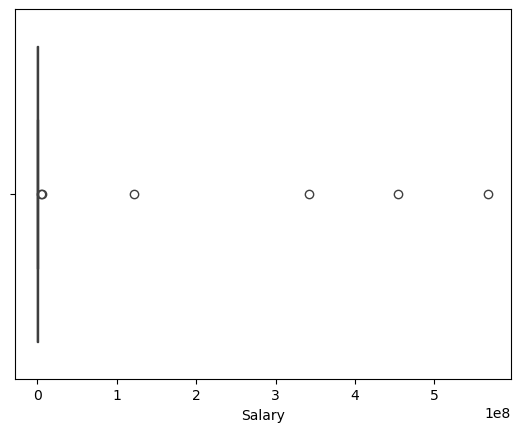

In [14]:
sns.boxplot(x=Career2["Salary"])
plt.show()

Plots reveal extreme salary values, indicating outliers.

# 13.Removing Outliers

In [17]:
Q1 = Career2["Salary"].quantile(0.25)
Q3 = Career2["Salary"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
clean_Career = Career2[(Career2["Salary"] >= lower_bound) & (Career2["Salary"] <= upper_bound)]


The Interquartile Range method is used to remove 6 extreme salary observations.

# 14. Salary by Gender

In [18]:
mean_salary = clean_Career.groupby("Gender")["Salary"].mean()
print(mean_salary)

Gender
Female    115712.878341
Male      115929.446230
Name: Salary, dtype: float64


Average salary is similar for both genders, indicating minimal difference.

# 15. Creating Dummy Variables

In [19]:
career_dummies = pd.get_dummies(clean_Career, drop_first=True).astype(int)


Categorical variables are converted into dummy variables to prepare the data for regression analysis.

# 16. Logistic Regression

In [20]:
y = career_dummies['Likely to Change Occupation']
X = career_dummies.drop(columns=['Likely to Change Occupation', 'Career Change Interest'])
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450922
         Iterations 6
                                Logit Regression Results                               
Dep. Variable:     Likely to Change Occupation   No. Observations:                 4934
Model:                                   Logit   Df Residuals:                     4895
Method:                                    MLE   Df Model:                           38
Date:                         Tue, 27 Jan 2026   Pseudo R-squ.:                  0.3398
Time:                                 19:12:28   Log-Likelihood:                -2224.8
converged:                                True   LL-Null:                       -3370.2
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

A logistic regression model is used to predict the likelihood of changing occupation. The model shows strong explanatory power (Pseudo R² = 0.3398). Key findings include:
Higher Job Satisfaction significantly reduces the likelihood of changing jobs.
Higher Salary also reduces job-change probability.
Most demographic variables are not statistically significant.

# 17. Save the cleaned data file (Excel + CSV)

In [23]:
clean_Career.to_excel("Career_cleaned.xlsx", index=False)
clean_Career.to_csv("Career_cleaned.csv", index=False)

print("Saved: Career_cleaned.xlsx and Career_cleaned.csv")


Saved: Career_cleaned.xlsx and Career_cleaned.csv


Where it saves: it will save in your current working folder (same place as your notebook/script, unless you set a path).

In [28]:
# To check your folder
import os
print(os.getcwd())
print(os.listdir())

/Users/sanghpriyasalve
['.zshrc.save', '.config', 'Music', 'Manchester_house_Dataset[3678].ipynb', '.zprofile.pysave', 'salary_data.csv', 'Untitled5.ipynb', 'Untitled1.ipynb', 'sales_data.csv', 'orders.csv', 'portfolio_data.csv', '.DS_Store', 'Career_cleaned.xlsx', '.CFUserTextEncoding', 'fund_returns.csv', '.xonshrc', 'risk_data.csv', 'anaconda_projects', 'Untitled3.ipynb', 'Manchester_house_Dataset 2.csv', 'Untitled.ipynb', '.zshrc', '24180328_Maths_Assignment.ipynb', 'Untitled4.ipynb', 'investment_data_project1.ipynb', 'Pictures', '.zprofile', 'departments.csv', '.zsh_history', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', 'customer_data.ipynb', 'customer_data.csv', 'feedback_data.ipynb', 'AlexYT_notes.ipynb', 'Manchester_house_Dataset.csv', 'Career_cleaned.csv', 'Public', 'Practices file for the Assignment .ipynb', 'investment_data_project1.csv', '.idlerc', '.tcshrc', 'sales_data.ipynb', '.anaconda', 'Programming class 15.1.26.ipynb', 'Movies', 'Applications',

# 18. Save the regression output (Logit summary) to a file

In [29]:
with open("logit_regression_summary.txt", "w") as f:
    f.write(result.summary().as_text())

print("Saved: logit_regression_summary.txt")

Saved: logit_regression_summary.txt


In [30]:
coef_table = result.summary2().tables[1]   # requires summary2
coef_table.to_excel("logit_coefficients.xlsx")

print("Saved: logit_coefficients.xlsx")

Saved: logit_coefficients.xlsx


# 19. Save plots (figures) properly

In [32]:
plt.savefig("salary_boxplot.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

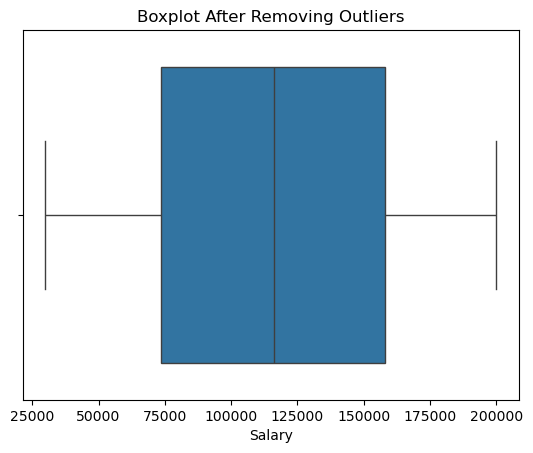

In [33]:
sns.boxplot(x=clean_Career["Salary"])
plt.title("Boxplot After Removing Outliers")
plt.savefig("boxplot_after_outliers.png", dpi=300, bbox_inches="tight")
plt.show()

# 20. Get the updated “modified file” version (Word / Docx)

In [35]:
# First, install the required package
!pip install python-docx

# Then import and use it
from docx import Document

doc = Document()
doc.add_heading("CODED WORK OF PROJECT", level=1)

doc.add_paragraph("Paste your updated explanations + code blocks here...")

doc.save("Sample_Practice_UPDATED.docx")
print("Saved: Sample_Practice_UPDATED.docx")

Saved: Sample_Practice_UPDATED.docx


In [37]:

import os

files = ["Career_cleaned.xlsx", "logit_regression_summary.txt", "Sample_Practice_UPDATED.docx"]

for file in files:
    if os.path.exists(file):
        print(f"File '{file}' is available in the current directory")
    else:
        print(f"Warning: File '{file}' not found in the current directory")


File 'Career_cleaned.xlsx' is available in the current directory
File 'logit_regression_summary.txt' is available in the current directory
File 'Sample_Practice_UPDATED.docx' is available in the current directory
